# **Project Name**: **Student Performance Prediction and Grade Classification**  
# **File Name**: **Classification** 
---
## **Group Members**:  
1. **Asad Ali** - **2022-ag-8598**  
2. **Faizan Khawar** - **2022-ag-8612**  
3. **Muhammad Salman** - **2022-ag-8629**   

### **Instructor**: Sir Shoaib Farooq  
### **Course Title**: Machine Learning  
### **Section**: BSCS 5th (Morning)  
### **Date**: December 22, 2024  
---

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Read and Load Dataset

In [381]:
df = pd.read_csv('student_dataset.csv')

In [382]:
df.tail()

,attribute_0,avg_marks,min_marks,max_marks,surrounding_environment,level_of_comfortable_zone_for_student,university_contribution_in_paper_setting,stud_contribution_in_fighting_for_exam,stud_teacher_contribution_in_learning,gender,...,inappropriate_yllabus,family_responsiblities,festival_holidays,financial_status,incentive_programs,exam_stress,overall_pg_performance,pg_sem_4_10_classes,pg_class_coded,pg_class_coded_cat
3887,3887.0,106.666667,80.75,81.75,6.0,6.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,6.0,6.0,2
3888,3888.0,103.333333,75.75,78.75,6.0,6.0,2.0,2.0,2.0,2.0,...,3.0,1.0,1.0,3.0,1.0,1.0,1.0,6.0,6.0,2
3889,3889.0,105.000000,75.75,83.75,6.0,6.0,2.0,2.0,2.0,2.0,...,3.0,1.0,1.0,3.0,1.0,2.0,2.0,7.0,7.0,3
3890,3890.0,78.666667,54.75,59.75,6.0,6.0,3.0,2.0,3.0,2.0,...,1.0,1.0,1.0,3.0,2.0,1.0,1.0,7.0,7.0,3
3891,3891.0,74.666667,46.75,61.75,6.0,6.0,3.0,2.0,3.0,2.0,...,1.0,1.0,1.0,3.0,2.0,1.0,2.0,7.0,7.0,3


In [383]:
df.shape

(3892, 36)

In [384]:
df.columns #printing name of columns

Index(['attribute_0', 'avg_marks', 'min_marks', 'max_marks',
       'surrounding_environment', 'level_of_comfortable_zone_for_student',
       'university_contribution_in_paper_setting',
       'stud_contribution_in_fighting_for_exam',
       'stud_teacher_contribution_in_learning', 'gender', 'location',
       'pg_sem_2', 'pg_sem_3', 'travel_time', 'study_hours',
       'classattentiveness', 'extratutions', 'teachinglearninggap',
       'examenvironment', 'ownstudynotes', 'time_on_socialmedia',
       'use_online_course', 'familymotivation', 'expertmotivation',
       'friendsmotivation', 'health_issues', 'inappropriate_yllabus',
       'family_responsiblities', 'festival_holidays', 'financial_status',
       'incentive_programs', 'exam_stress', 'overall_pg_performance',
       'pg_sem_4_10_classes', 'pg_class_coded', 'pg_class_coded_cat'],
      dtype='object')

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   attribute_0                               3892 non-null   float64
 1   avg_marks                                 3892 non-null   float64
 2   min_marks                                 3892 non-null   float64
 3   max_marks                                 3892 non-null   float64
 4   surrounding_environment                   3892 non-null   float64
 5   level_of_comfortable_zone_for_student     3892 non-null   float64
 6   university_contribution_in_paper_setting  3892 non-null   float64
 7   stud_contribution_in_fighting_for_exam    3892 non-null   float64
 8   stud_teacher_contribution_in_learning     3892 non-null   float64
 9   gender                                    3892 non-null   float64
 10  location                            

In [386]:
df.isna()

,attribute_0,avg_marks,min_marks,max_marks,surrounding_environment,level_of_comfortable_zone_for_student,university_contribution_in_paper_setting,stud_contribution_in_fighting_for_exam,stud_teacher_contribution_in_learning,gender,...,inappropriate_yllabus,family_responsiblities,festival_holidays,financial_status,incentive_programs,exam_stress,overall_pg_performance,pg_sem_4_10_classes,pg_class_coded,pg_class_coded_cat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [387]:
df.isna().sum()

attribute_0                                 0
avg_marks                                   0
min_marks                                   0
max_marks                                   0
surrounding_environment                     0
level_of_comfortable_zone_for_student       0
university_contribution_in_paper_setting    0
stud_contribution_in_fighting_for_exam      0
stud_teacher_contribution_in_learning       0
gender                                      0
location                                    0
pg_sem_2                                    0
pg_sem_3                                    0
travel_time                                 0
study_hours                                 0
classattentiveness                          0
extratutions                                0
teachinglearninggap                         0
examenvironment                             0
ownstudynotes                               0
time_on_socialmedia                         0
use_online_course                 

## Checking null values

In [388]:
df.isna().sum().sum()

0

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   attribute_0                               3892 non-null   float64
 1   avg_marks                                 3892 non-null   float64
 2   min_marks                                 3892 non-null   float64
 3   max_marks                                 3892 non-null   float64
 4   surrounding_environment                   3892 non-null   float64
 5   level_of_comfortable_zone_for_student     3892 non-null   float64
 6   university_contribution_in_paper_setting  3892 non-null   float64
 7   stud_contribution_in_fighting_for_exam    3892 non-null   float64
 8   stud_teacher_contribution_in_learning     3892 non-null   float64
 9   gender                                    3892 non-null   float64
 10  location                            

### => So there is no categorical values

## Grouping

In [390]:
G1= df.iloc[ : , :12]
G1.shape

(3892, 12)

In [391]:
G2= df.iloc[ : , 12:24]
G2.shape

(3892, 12)

In [392]:
G3= df.iloc[ : , 24:36]
G3.shape

(3892, 12)

## Corelations and heatmap of them

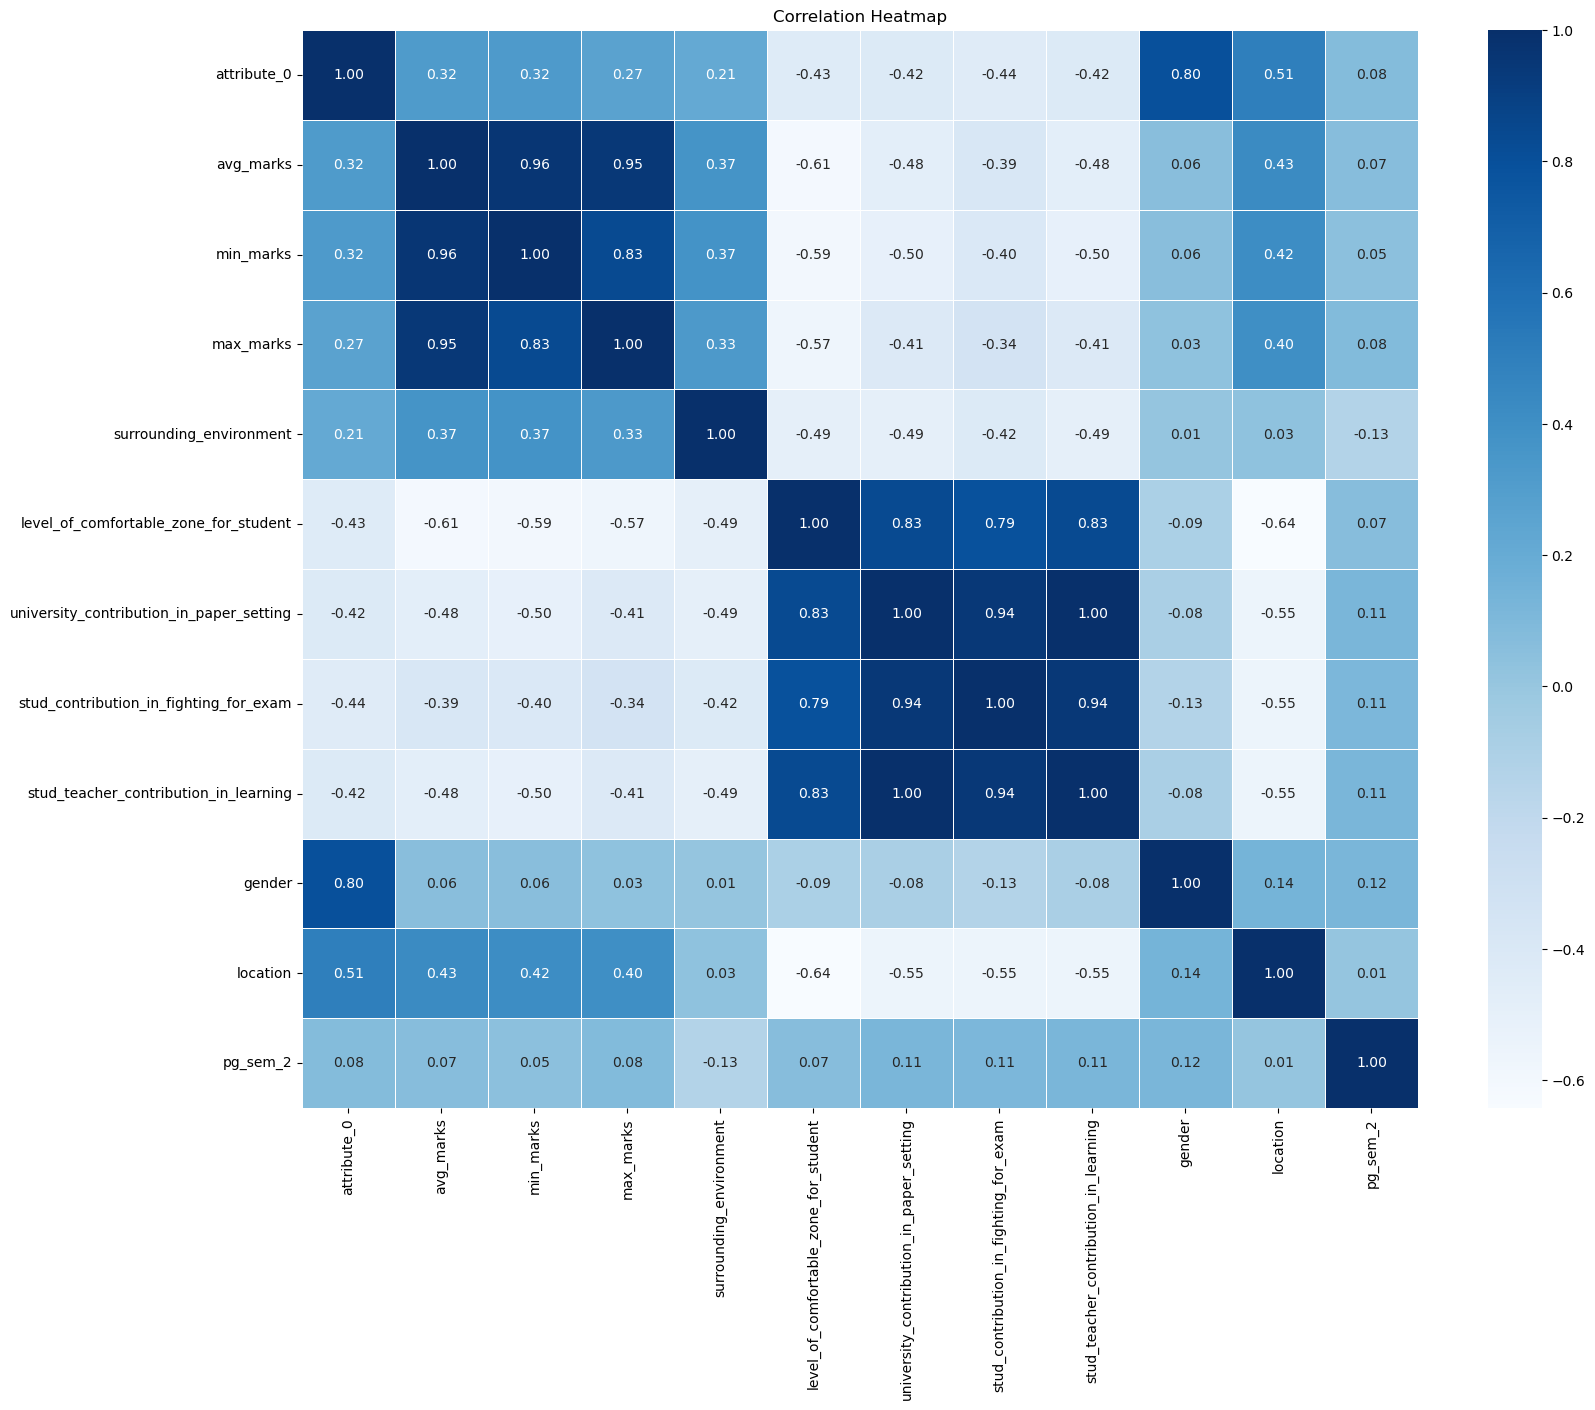

In [393]:
corr_matrix = G1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

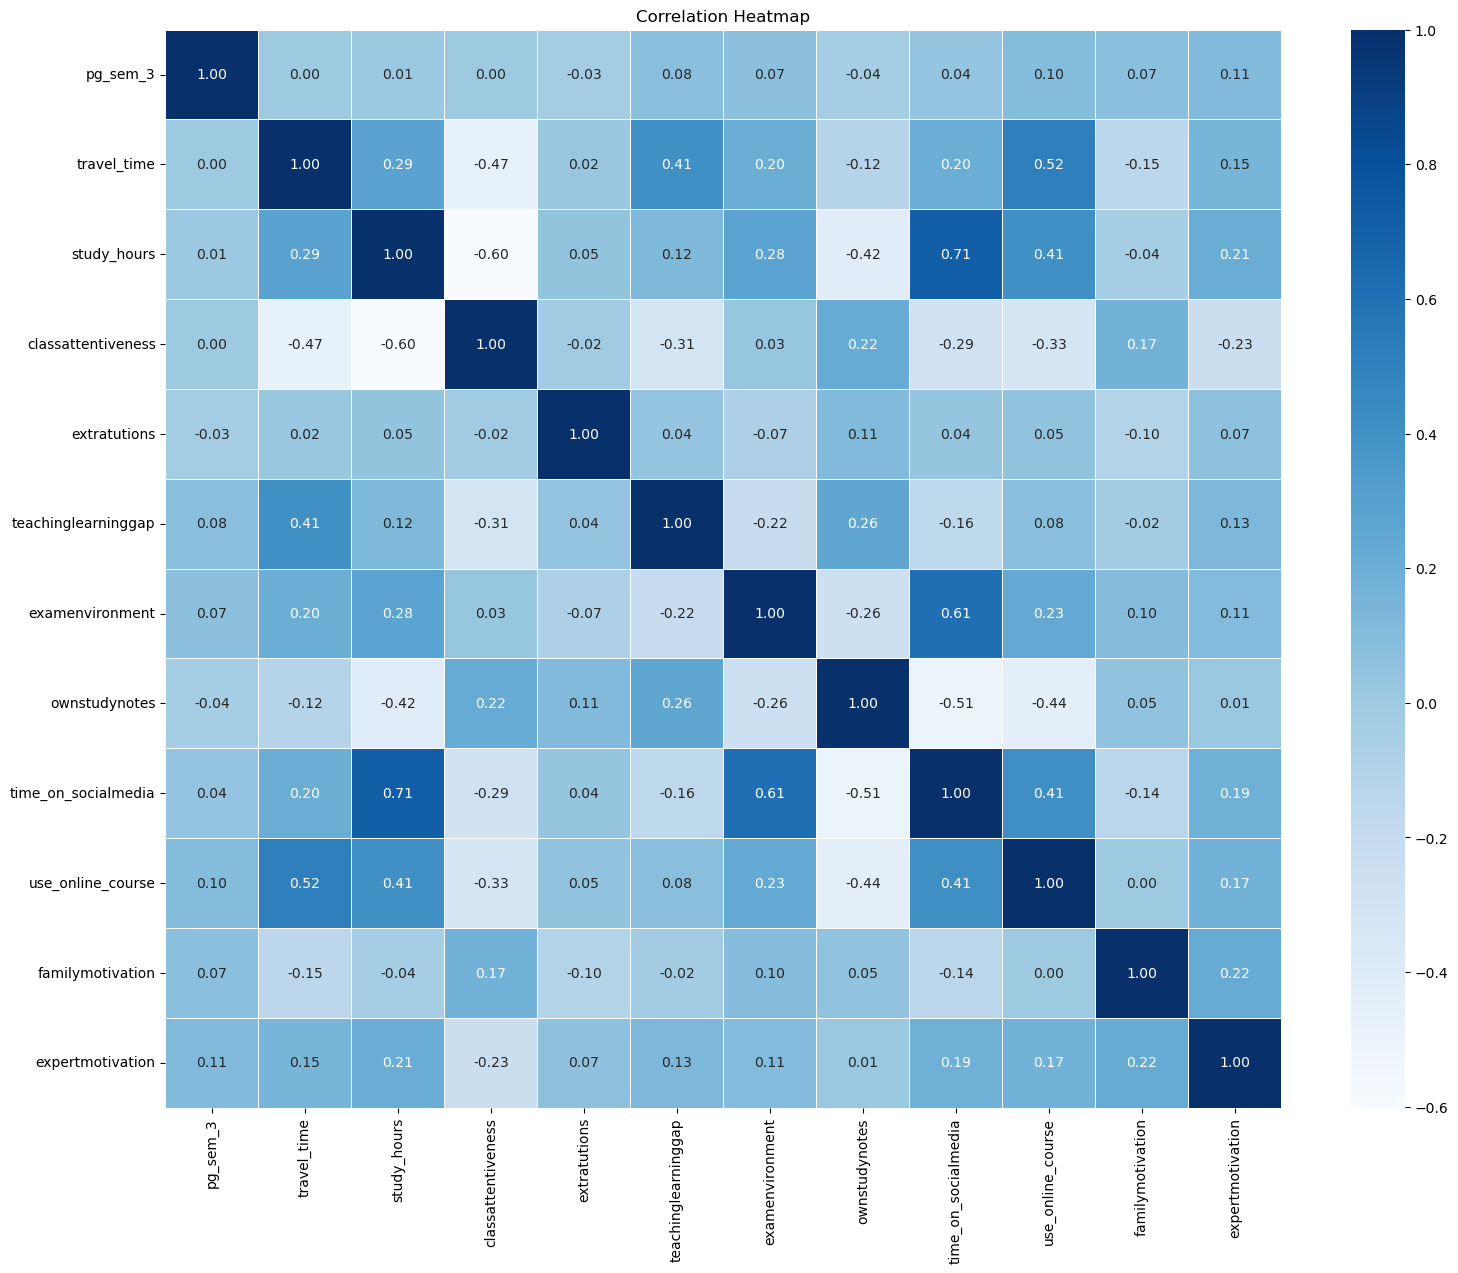

In [394]:
corr_matrix =G2.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

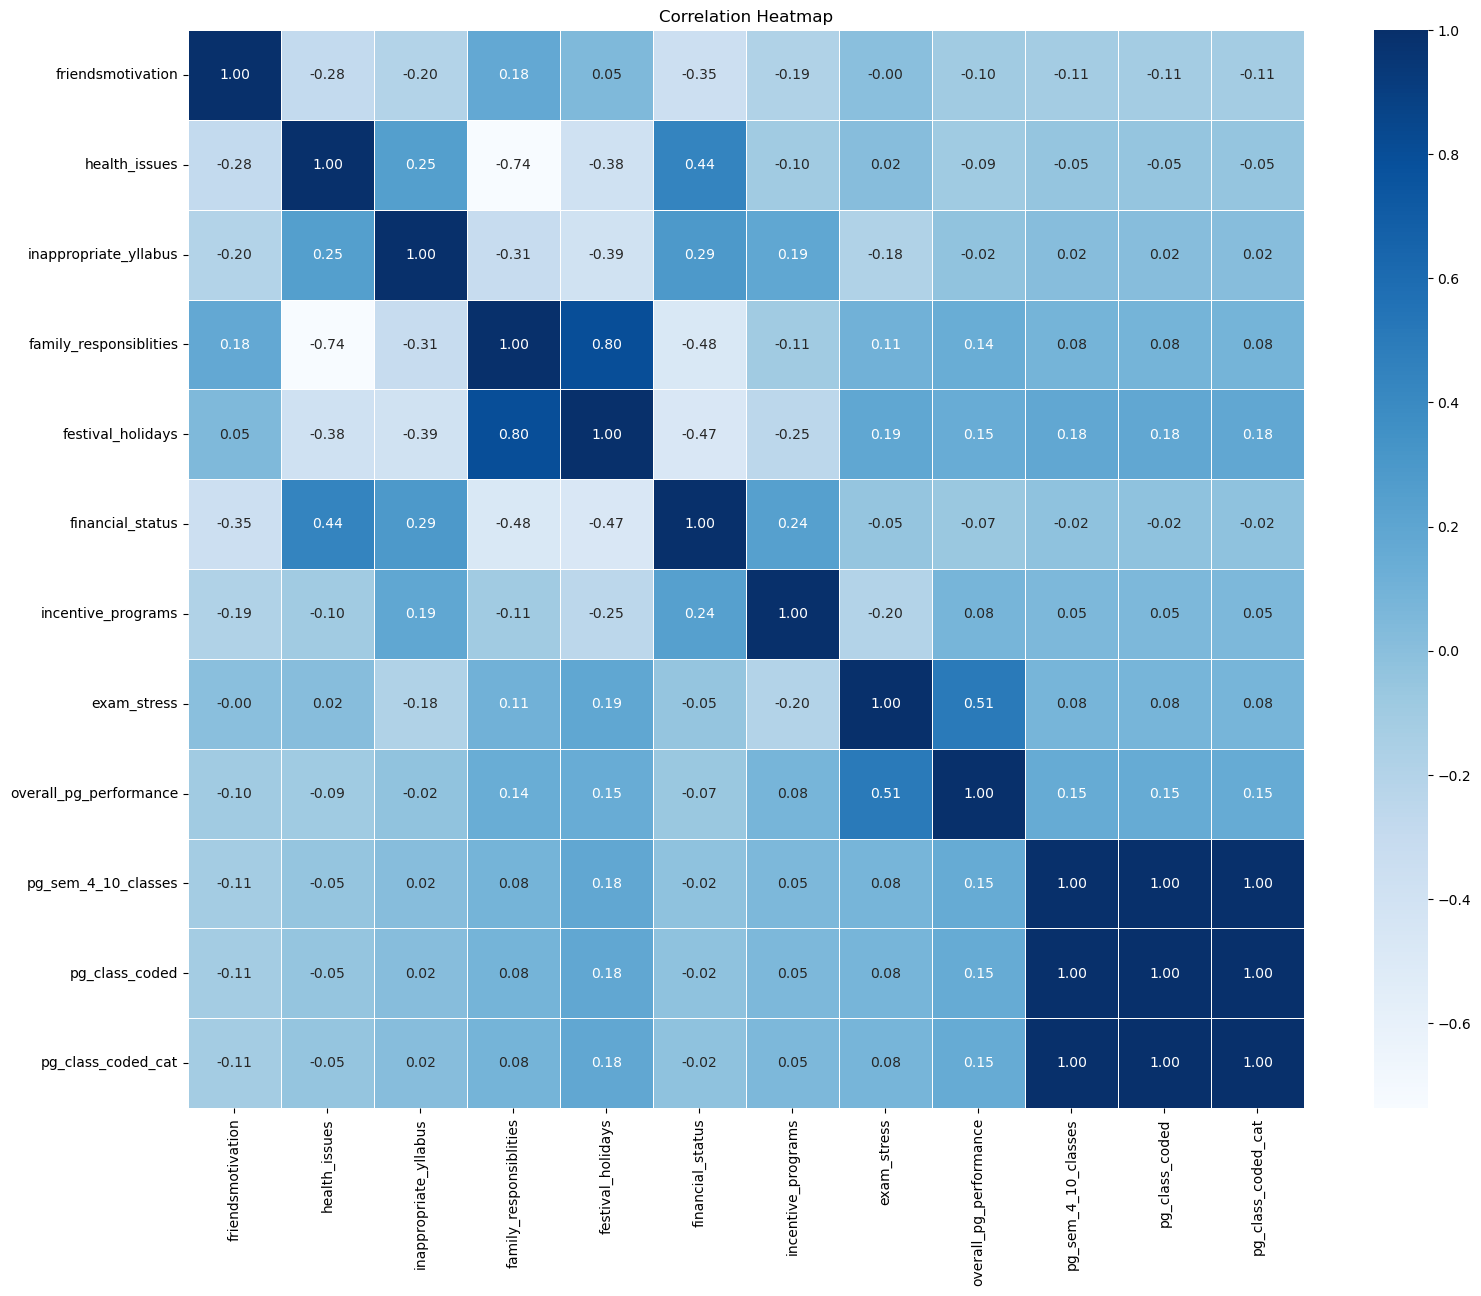

In [395]:
corr_matrix = G3.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [396]:
# Heatmap for First Half

In [397]:
df= df.drop(["travel_time", "use_online_course", "friendsmotivation" , "familymotivation","attribute_0","pg_sem_3" , "classattentiveness"] , axis=1)

In [398]:
df_correlation= pd.concat([G1, G2,G3], axis=1, ignore_index=False)

## OVERALL HEATMAP

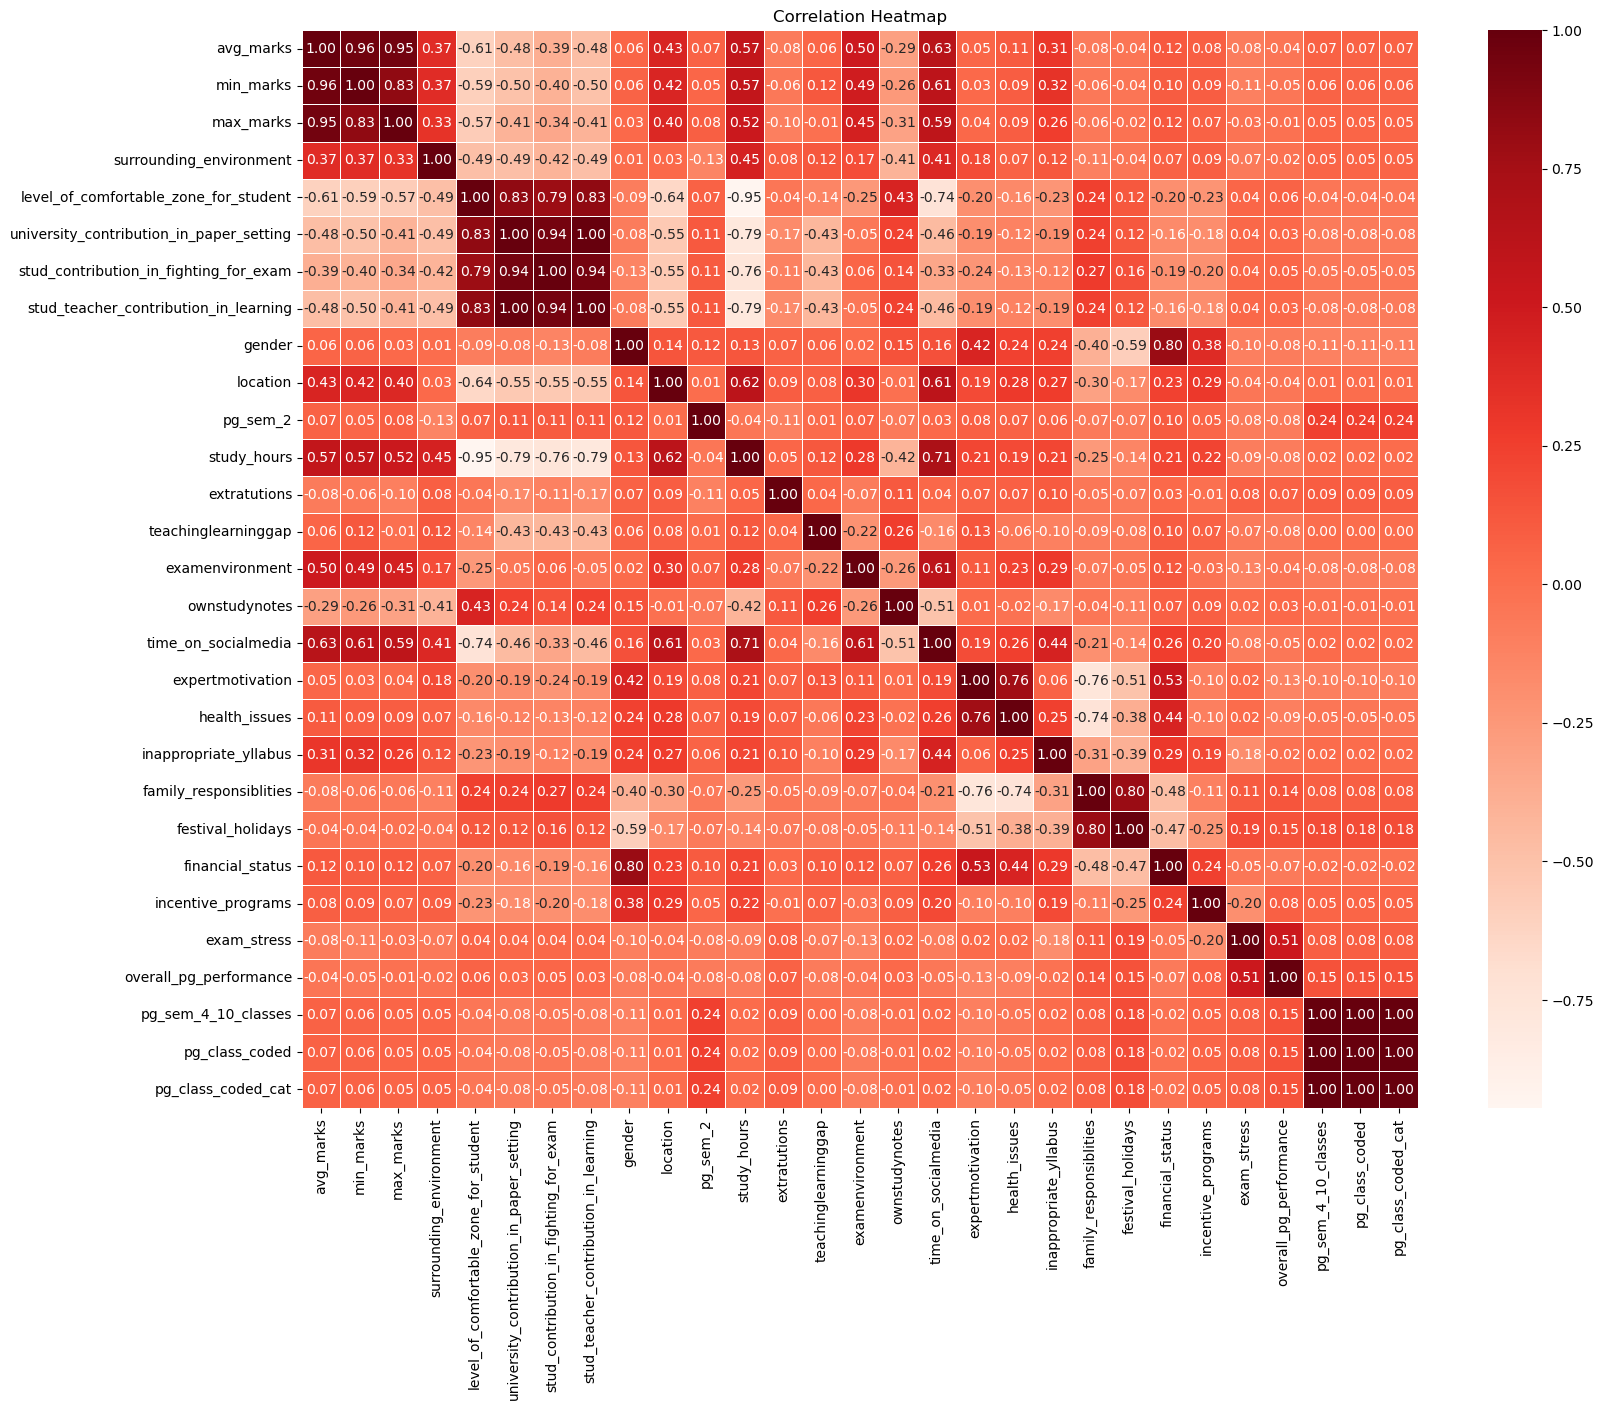

In [399]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Separate Class And Features

In [400]:
X = df.drop('pg_class_coded', axis=1)  
Y = df['pg_class_coded']

In [401]:
print(X)

       avg_marks  min_marks  max_marks  surrounding_environment  \
0      68.166667  42.500000  54.500000                      3.0   
1      68.214286  42.535714  54.535714                      3.0   
2      74.966667  47.600000  59.600000                      3.0   
3      75.500000  48.000000  60.000000                      3.0   
4      76.166667  48.500000  60.500000                      3.0   
...          ...        ...        ...                      ...   
3887  106.666667  80.750000  81.750000                      6.0   
3888  103.333333  75.750000  78.750000                      6.0   
3889  105.000000  75.750000  83.750000                      6.0   
3890   78.666667  54.750000  59.750000                      6.0   
3891   74.666667  46.750000  61.750000                      6.0   

      level_of_comfortable_zone_for_student  \
0                                       9.0   
1                                       9.0   
2                                       9.0   
3      

In [402]:
print(Y)

0       6.0
1       6.0
2       7.0
3       7.0
4       7.0
       ... 
3887    6.0
3888    6.0
3889    7.0
3890    7.0
3891    7.0
Name: pg_class_coded, Length: 3892, dtype: float64


## Standardized Features

In [403]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.53058647, -1.68699591, -1.61030488, ..., -0.94932643,
        -0.24123161, -0.24123161],
       [-1.52743474, -1.68417641, -1.60719722, ..., -0.94932643,
        -0.24123161, -0.24123161],
       [-1.08051932, -1.28437225, -1.16653093, ..., -0.94932643,
         1.32355744,  1.32355744],
       ...,
       [ 0.90727723,  0.93795246,  0.93486928, ...,  0.60571501,
         1.32355744,  1.32355744],
       [-0.83562985, -0.71990967, -1.15347875, ..., -0.94932643,
         1.32355744,  1.32355744],
       [-1.10037523, -1.35147619, -0.97944975, ...,  0.60571501,
         1.32355744,  1.32355744]])

## Apply PCA

In [404]:
pca = PCA(n_components=20)  
X_pca = pca.fit_transform(X_scaled)

In [405]:
df.shape

(3892, 29)

## Split Dataset

In [406]:
# spliting dataset
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X_pca,Y, test_size =0.2, random_state=80)

In [407]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  3113
Size of Train Y =  3113
Size of Test X =  779
Size of Test Y =  779


## Logestic Regression

### Training 

In [408]:
from sklearn.linear_model import LogisticRegression
df = LogisticRegression(solver='liblinear', random_state=75)
df.fit(X_TRAIN, Y_TRAIN)
LogisticRegression(random_state=75, solver='liblinear')


LogisticRegression(random_state=75, solver='liblinear')

In [409]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[6. 7. 6. ... 6. 6. 7.]


In [410]:
print(Y_TRAIN)

2275    6.0
975     7.0
422     6.0
840     7.0
3843    6.0
       ... 
522     6.0
2259    6.0
2982    6.0
1212    6.0
1199    7.0
Name: pg_class_coded, Length: 3113, dtype: float64


### Training Accuracy 

In [411]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 0.9611307420494699


### Draw Confusion Matrix

In [412]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN,y_pred)

array([[   0,    7,    0,    0,    0],
       [   0,  327,    6,    0,    0],
       [   0,    0, 1990,    0,    0],
       [   0,    0,   42,  675,    0],
       [   0,    0,    0,   66,    0]], dtype=int64)

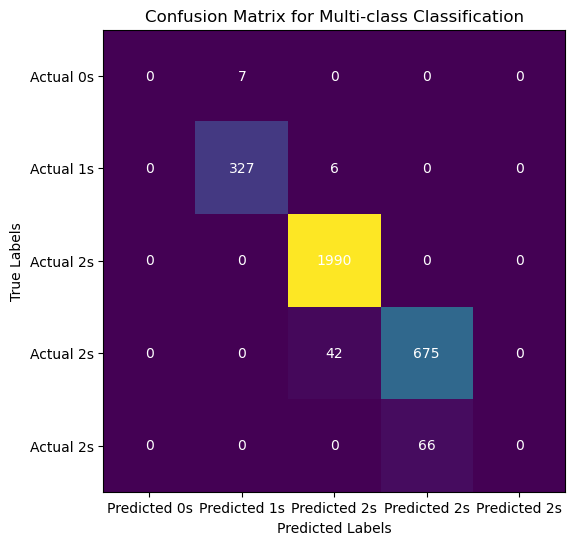

In [413]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Testing On Test Set

In [414]:
y_pred = df.predict(X_TEST)
print(y_pred)

[6. 7. 6. 7. 6. 6. 6. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6.
 6. 6. 6. 5. 6. 6. 5. 7. 6. 6. 6. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6.
 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6.
 7. 7. 7. 6. 7. 6. 7. 6. 7. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 5. 6. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6.
 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 7. 6. 6. 7. 7. 7. 7. 6. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6. 6. 7. 6. 5. 6.
 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 6. 6. 7.
 6. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 5. 6. 7. 6. 6. 6. 6. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 7. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6.
 6. 6. 6. 6. 6. 7. 7. 5. 6. 7. 6. 5. 6. 7. 7. 5. 6. 6. 5. 6. 7. 6. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 7. 6. 5. 5.

In [415]:
print(Y_TEST)

64      6.0
2144    7.0
3349    6.0
1566    7.0
1323    6.0
       ... 
1705    6.0
1872    6.0
2240    5.0
3459    6.0
2276    6.0
Name: pg_class_coded, Length: 779, dtype: float64


### Testing Accuracy

In [416]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)


The Accuracy of Prediction on S is  0.9525032092426188


### Draw Confusion Matrix

In [417]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[  0,   3,   0,   0,   0],
       [  0,  94,   1,   0,   0],
       [  0,   0, 499,   0,   0],
       [  0,   0,  16, 149,   0],
       [  0,   0,   0,  17,   0]], dtype=int64)

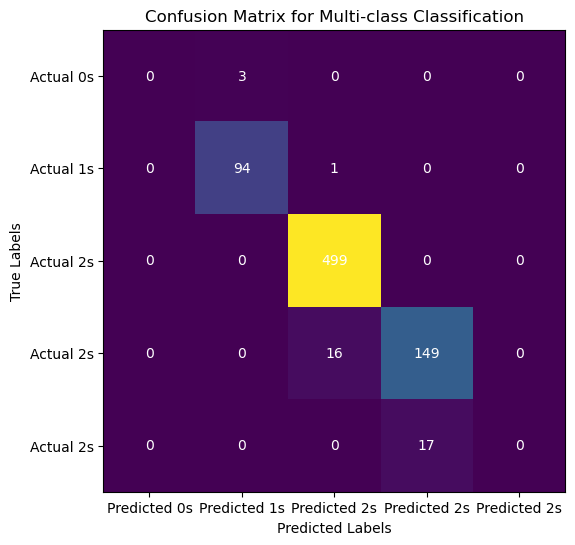

In [418]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Generate Classification Report

In [419]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         3
         5.0       0.97      0.99      0.98        95
         6.0       0.97      1.00      0.98       499
         7.0       0.90      0.90      0.90       165
         8.0       0.00      0.00      0.00        17

    accuracy                           0.95       779
   macro avg       0.57      0.58      0.57       779
weighted avg       0.93      0.95      0.94       779



## Gaussian Naive Base

### Training 

In [420]:
from sklearn.naive_bayes import GaussianNB
data = GaussianNB()
data.fit(X_TRAIN, Y_TRAIN)
GaussianNB()

GaussianNB()

In [421]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[6. 7. 6. ... 6. 6. 7.]


In [422]:
print(Y_TRAIN)

2275    6.0
975     7.0
422     6.0
840     7.0
3843    6.0
       ... 
522     6.0
2259    6.0
2982    6.0
1212    6.0
1199    7.0
Name: pg_class_coded, Length: 3113, dtype: float64


### Training Accuracy

In [423]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 0.9611307420494699


### Draw Confusion Matrix

In [424]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN,y_pred)

array([[   0,    7,    0,    0,    0],
       [   0,  327,    6,    0,    0],
       [   0,    0, 1990,    0,    0],
       [   0,    0,   42,  675,    0],
       [   0,    0,    0,   66,    0]], dtype=int64)

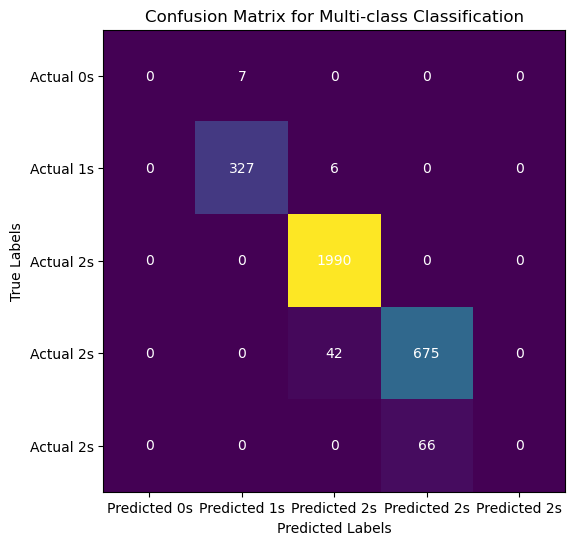

In [425]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Performing Testing on Test Set

In [426]:
y_pred = df.predict(X_TEST)
print(y_pred)

[6. 7. 6. 7. 6. 6. 6. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6.
 6. 6. 6. 5. 6. 6. 5. 7. 6. 6. 6. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6.
 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6.
 7. 7. 7. 6. 7. 6. 7. 6. 7. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 5. 6. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6.
 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 7. 6. 6. 7. 7. 7. 7. 6. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6. 6. 7. 6. 5. 6.
 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 6. 6. 7.
 6. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 5. 6. 7. 6. 6. 6. 6. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 7. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6.
 6. 6. 6. 6. 6. 7. 7. 5. 6. 7. 6. 5. 6. 7. 7. 5. 6. 6. 5. 6. 7. 6. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 7. 6. 5. 5.

In [427]:
print(Y_TEST)

64      6.0
2144    7.0
3349    6.0
1566    7.0
1323    6.0
       ... 
1705    6.0
1872    6.0
2240    5.0
3459    6.0
2276    6.0
Name: pg_class_coded, Length: 779, dtype: float64


### Testing Accuracy

In [428]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)


The Accuracy of Prediction on S is  0.9525032092426188


### Draw Confusion Matrix

In [429]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[  0,   3,   0,   0,   0],
       [  0,  94,   1,   0,   0],
       [  0,   0, 499,   0,   0],
       [  0,   0,  16, 149,   0],
       [  0,   0,   0,  17,   0]], dtype=int64)

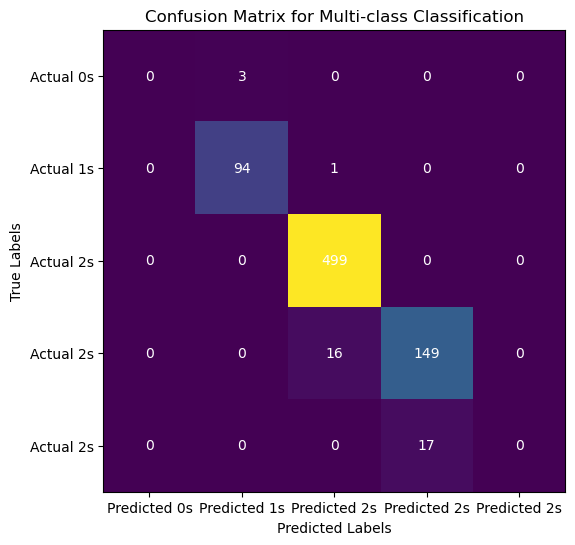

In [430]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Generate Classification Report

In [431]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         3
         5.0       0.97      0.99      0.98        95
         6.0       0.97      1.00      0.98       499
         7.0       0.90      0.90      0.90       165
         8.0       0.00      0.00      0.00        17

    accuracy                           0.95       779
   macro avg       0.57      0.58      0.57       779
weighted avg       0.93      0.95      0.94       779



## Support Vector Machine

###  Training 

In [432]:
from sklearn import svm
df = svm.SVC(kernel='linear',random_state=75) 
df.fit(X_TRAIN, Y_TRAIN) 

SVC(kernel='linear', random_state=75)

In [433]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[6. 7. 6. ... 6. 6. 7.]


In [434]:
print(Y_TRAIN)

2275    6.0
975     7.0
422     6.0
840     7.0
3843    6.0
       ... 
522     6.0
2259    6.0
2982    6.0
1212    6.0
1199    7.0
Name: pg_class_coded, Length: 3113, dtype: float64


### Training Accuracy

In [435]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 1.0


### Draw Confusion Matrix

In [436]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN,y_pred)

array([[   7,    0,    0,    0,    0],
       [   0,  333,    0,    0,    0],
       [   0,    0, 1990,    0,    0],
       [   0,    0,    0,  717,    0],
       [   0,    0,    0,    0,   66]], dtype=int64)

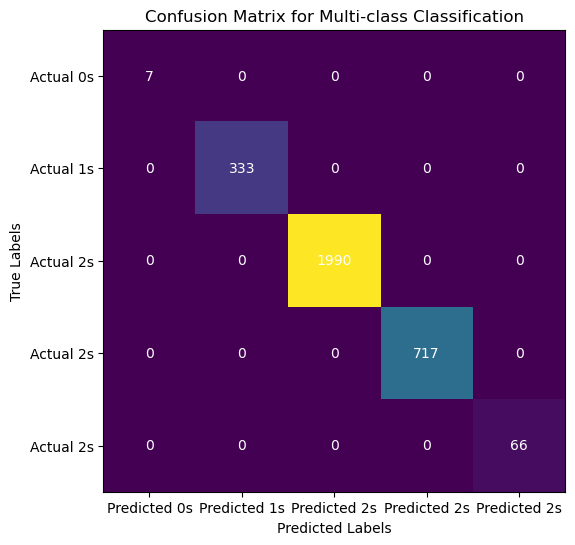

In [437]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Performing Testing on Test Set

In [438]:
y_pred = df.predict(X_TEST)
print(y_pred)

[6. 7. 6. 7. 6. 6. 6. 7. 6. 6. 6. 6. 7. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6.
 6. 6. 6. 5. 6. 6. 5. 7. 6. 6. 6. 7. 6. 6. 8. 6. 6. 6. 6. 8. 6. 6. 5. 7.
 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6.
 7. 7. 7. 6. 7. 6. 7. 6. 7. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 5. 6. 7. 5. 7. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6.
 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 8. 6. 6. 8. 7. 7. 7. 6. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 8. 6. 6. 6. 7. 6. 5. 6.
 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 6. 6. 7.
 6. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 4. 6. 7. 6. 6. 6. 6. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 7. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 7. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 6. 5. 6. 7. 6. 7. 6. 7. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6.
 6. 6. 6. 7. 6. 8. 7. 5. 6. 8. 6. 5. 6. 7. 7. 5. 6. 6. 5. 6. 7. 6. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 7. 6. 5. 5.

In [439]:
print(Y_TEST)

64      6.0
2144    7.0
3349    6.0
1566    7.0
1323    6.0
       ... 
1705    6.0
1872    6.0
2240    5.0
3459    6.0
2276    6.0
Name: pg_class_coded, Length: 779, dtype: float64


### Testing Accuracy

In [440]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  1.0


### Draw Confusion Matrix

In [441]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[  3,   0,   0,   0,   0],
       [  0,  95,   0,   0,   0],
       [  0,   0, 499,   0,   0],
       [  0,   0,   0, 165,   0],
       [  0,   0,   0,   0,  17]], dtype=int64)

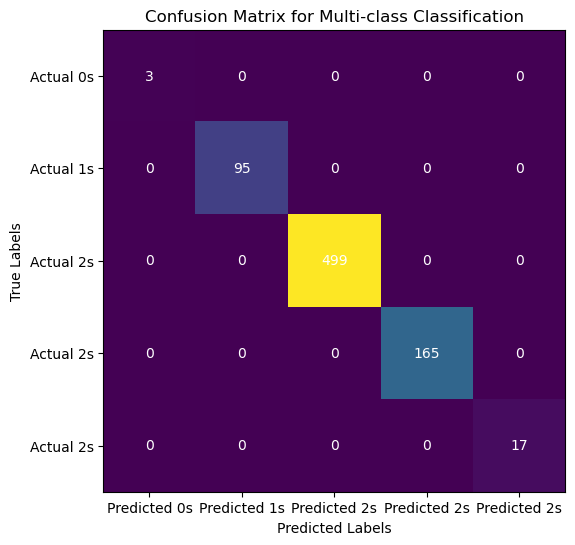

In [442]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Generate Classification Report

In [443]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00        95
         6.0       1.00      1.00      1.00       499
         7.0       1.00      1.00      1.00       165
         8.0       1.00      1.00      1.00        17

    accuracy                           1.00       779
   macro avg       1.00      1.00      1.00       779
weighted avg       1.00      1.00      1.00       779



## Decision Tree

### Perform Training on Train Set

In [444]:
from sklearn.tree import DecisionTreeClassifier

In [445]:
df = DecisionTreeClassifier(random_state = 80)

In [446]:
df.fit(X_TRAIN, Y_TRAIN) 
DecisionTreeClassifier(random_state=80)

DecisionTreeClassifier(random_state=80)

In [447]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[6. 7. 6. ... 6. 6. 7.]


In [448]:
print(Y_TRAIN)

2275    6.0
975     7.0
422     6.0
840     7.0
3843    6.0
       ... 
522     6.0
2259    6.0
2982    6.0
1212    6.0
1199    7.0
Name: pg_class_coded, Length: 3113, dtype: float64


### Training Accuracy

In [449]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('The Accuracy of prediction on S is',accuracy)

The Accuracy of prediction on S is 1.0


### Draw Confusion Matrix

In [450]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN,y_pred)

array([[   7,    0,    0,    0,    0],
       [   0,  333,    0,    0,    0],
       [   0,    0, 1990,    0,    0],
       [   0,    0,    0,  717,    0],
       [   0,    0,    0,    0,   66]], dtype=int64)

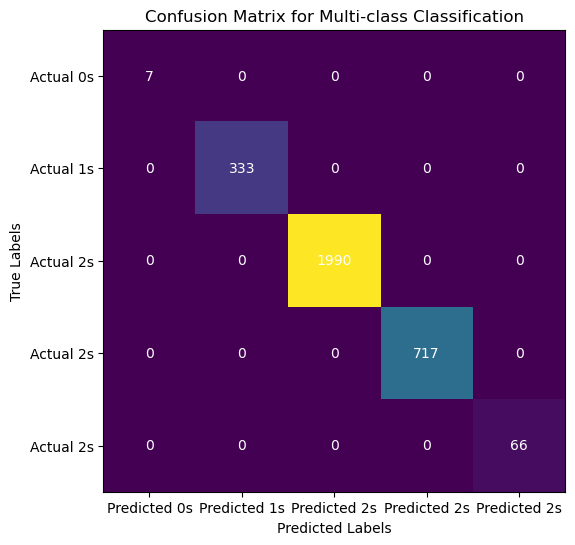

In [451]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Perform Testing On test Set

In [452]:
y_pred = df.predict(X_TEST)
print(y_pred)

[6. 7. 6. 7. 6. 6. 6. 7. 6. 6. 6. 6. 7. 5. 5. 6. 6. 6. 6. 6. 6. 7. 6. 6.
 6. 6. 6. 5. 6. 6. 5. 7. 6. 6. 6. 7. 6. 6. 8. 6. 6. 6. 6. 8. 6. 6. 5. 7.
 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6.
 7. 7. 7. 6. 7. 6. 7. 6. 7. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 5. 6. 7. 5. 7. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6.
 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 8. 6. 6. 8. 7. 7. 7. 6. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 8. 6. 6. 6. 7. 6. 5. 6.
 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 6. 6. 7.
 6. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 4. 6. 7. 6. 6. 6. 6. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 7. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 7. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 6. 5. 6. 7. 6. 7. 6. 7. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6.
 6. 6. 6. 7. 6. 8. 7. 5. 6. 8. 6. 5. 6. 7. 7. 5. 6. 6. 5. 6. 7. 6. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 7. 6. 5. 5.

In [453]:
print(Y_TEST)

64      6.0
2144    7.0
3349    6.0
1566    7.0
1323    6.0
       ... 
1705    6.0
1872    6.0
2240    5.0
3459    6.0
2276    6.0
Name: pg_class_coded, Length: 779, dtype: float64


### Testing Accuracy 

In [454]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  0.9948652118100129


### Draw Confusion Matrix

In [455]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[  3,   0,   0,   0,   0],
       [  0,  94,   1,   0,   0],
       [  0,   1, 498,   0,   0],
       [  0,   0,   2, 163,   0],
       [  0,   0,   0,   0,  17]], dtype=int64)

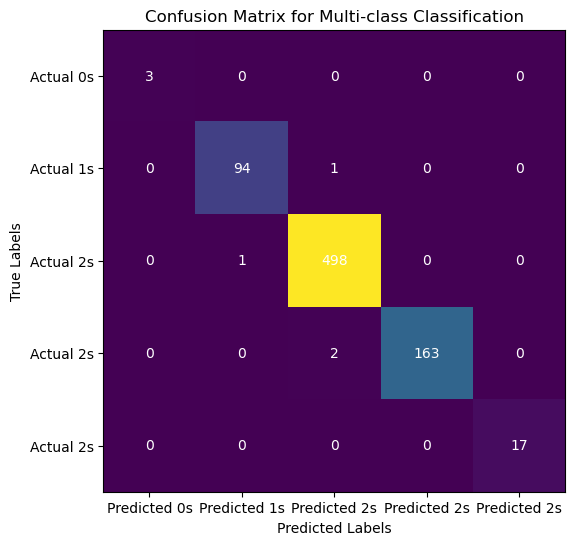

In [456]:
 import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Generate Calssification Report

In [457]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         3
         5.0       0.99      0.99      0.99        95
         6.0       0.99      1.00      1.00       499
         7.0       1.00      0.99      0.99       165
         8.0       1.00      1.00      1.00        17

    accuracy                           0.99       779
   macro avg       1.00      1.00      1.00       779
weighted avg       0.99      0.99      0.99       779



## Random Forest

### Perform Training on Train Set

In [458]:
from sklearn.ensemble import RandomForestClassifier
df = RandomForestClassifier(n_estimators=5, random_state=75)
 
df.fit(X_TRAIN, Y_TRAIN) 
RandomForestClassifier(n_estimators=5, random_state=75)

RandomForestClassifier(n_estimators=5, random_state=75)

In [459]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[6. 7. 6. ... 6. 6. 7.]


In [460]:
print(Y_TRAIN)

2275    6.0
975     7.0
422     6.0
840     7.0
3843    6.0
       ... 
522     6.0
2259    6.0
2982    6.0
1212    6.0
1199    7.0
Name: pg_class_coded, Length: 3113, dtype: float64


### Training Accuracy

In [461]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('The accuracy of prediction on S is',accuracy)

The accuracy of prediction on S is 0.9990362993896563


### Draw Confusion Matrix

In [462]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN,y_pred)

array([[   7,    0,    0,    0,    0],
       [   0,  332,    1,    0,    0],
       [   0,    0, 1990,    0,    0],
       [   0,    0,    1,  716,    0],
       [   0,    0,    0,    1,   65]], dtype=int64)

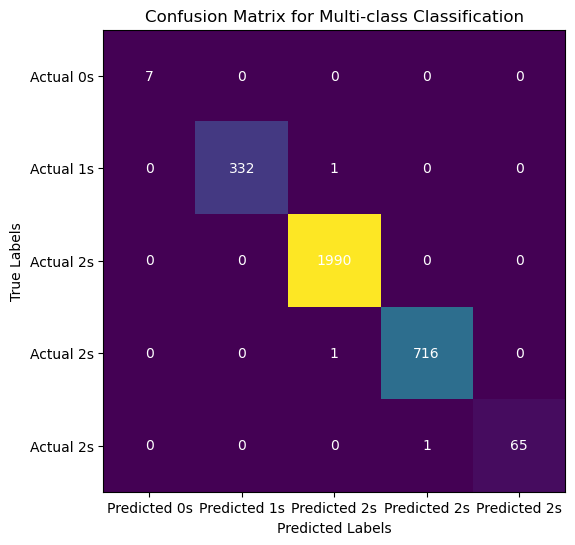

In [463]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Perform Testing On test set

In [464]:
y_pred = df.predict(X_TEST)
print(y_pred)

[6. 7. 6. 7. 6. 6. 6. 7. 6. 6. 6. 6. 7. 5. 6. 6. 6. 6. 6. 6. 6. 7. 6. 6.
 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 7. 6. 6. 8. 6. 6. 6. 6. 8. 6. 6. 5. 7.
 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 6. 5. 6. 6. 6.
 7. 7. 7. 6. 7. 6. 7. 6. 7. 6. 6. 7. 6. 6. 5. 5. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 7. 6. 6. 6. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 7. 6. 6. 6. 6. 6. 6.
 5. 5. 6. 7. 5. 7. 6. 7. 6. 6. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 7. 6. 6.
 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 8. 6. 6. 7. 7. 7. 7. 6. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 8. 6. 6. 6. 7. 6. 5. 6.
 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 7. 5. 7. 6. 6. 6. 6. 7.
 6. 6. 6. 5. 5. 5. 6. 7. 6. 6. 6. 5. 6. 7. 6. 6. 6. 6. 7. 6. 6. 7. 6. 7.
 6. 6. 7. 7. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 7. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 6. 6. 5. 6. 7. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 6. 5. 6.
 6. 6. 6. 7. 6. 8. 7. 5. 6. 8. 6. 5. 6. 7. 7. 5. 6. 6. 5. 6. 7. 6. 6. 6.
 7. 6. 6. 6. 6. 6. 6. 6. 7. 7. 6. 6. 6. 7. 6. 5. 5.

In [465]:
print(Y_TEST)

64      6.0
2144    7.0
3349    6.0
1566    7.0
1323    6.0
       ... 
1705    6.0
1872    6.0
2240    5.0
3459    6.0
2276    6.0
Name: pg_class_coded, Length: 779, dtype: float64


### Testing Accuracy

In [466]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  0.9845956354300385


### Draw Confusion Matrix

In [467]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[  0,   3,   0,   0,   0],
       [  0,  94,   1,   0,   0],
       [  0,   2, 497,   0,   0],
       [  0,   0,   5, 160,   0],
       [  0,   0,   0,   1,  16]], dtype=int64)

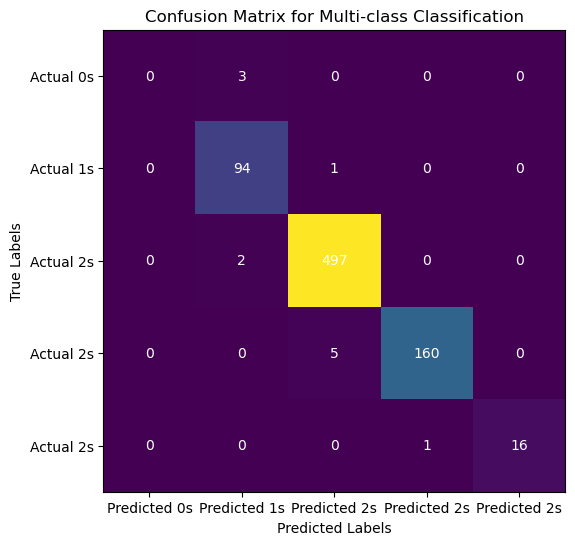

In [468]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Predicted 0s', 'Predicted 1s','Predicted 2s','Predicted 2s','Predicted 2s'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('Actual 0s', 'Actual 1s','Actual 2s','Actual 2s','Actual 2s'))
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')

# Displaying the plot
plt.title("Confusion Matrix for Multi-class Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Generate Classification Report

In [469]:
from sklearn.metrics import classification_report
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         3
         5.0       0.95      0.99      0.97        95
         6.0       0.99      1.00      0.99       499
         7.0       0.99      0.97      0.98       165
         8.0       1.00      0.94      0.97        17

    accuracy                           0.98       779
   macro avg       0.79      0.78      0.78       779
weighted avg       0.98      0.98      0.98       779



# **Model Performance Analysis Report**

---

## **Reports for Models**

| **Model**               | **Train Accuracy** | **Test Accuracy** | **Observation**                         |
|--------------------------|--------------------|-------------------|------------------------------------------|
| Logistic Regression      | 0.9611            | 0.9525            | Consistent, slightly lower on test data. |
| Gaussian Naive Bayes     | 0.9611            | 0.9525            | Consistent, same behavior as Logistic Regression. |
| Support Vector Machine   | 1.0000            | 1.0000            | Perfect accuracy, risk of overfitting.   |
| Decision Tree            | 1.0000            | 0.9949            | Slight overfitting, very high accuracy.  |
| Random Forest            | 0.9990            | 0.9846            | High accuracy, slight overfitting.       |

---

## **1. Accuracy on Train Data and Test Data**

### **Logistic Regression**
- **Train Accuracy:** 0.9611  
- **Test Accuracy:** 0.9525  
- **Observation:** Slightly lower test accuracy but consistent.

### **Gaussian Naive Bayes**
- **Train Accuracy:** 0.9611  
- **Test Accuracy:** 0.9525  
- **Observation:** Same as Logistic Regression, showing consistency.

### **Support Vector Machine**
- **Train Accuracy:** 1.0000  
- **Test Accuracy:** 1.0000  
- **Observation:** Perfect fit for both train and test data, suggesting possible overfitting.

### **Decision Tree**
- **Train Accuracy:** 1.0000  
- **Test Accuracy:** 0.9949  
- **Observation:** Excellent accuracy but slight overfitting.

### **Random Forest**
- **Train Accuracy:** 0.9990  
- **Test Accuracy:** 0.9846  
- **Observation:** Slightly lower test accuracy, well-balanced overall.

---

## **2. Overfitting**

**Overfitting occurs when the model performs exceptionally well on training data but less well on testing data.**  
- **Support Vector Machine:** Shows overfitting tendencies, with a perfect 1.0 accuracy on both train and test datasets, which may not generalize well.  
- **Decision Tree:** Also shows some overfitting, as it achieves perfect train accuracy but slightly lower test accuracy (0.9949).  
- **Random Forest:** Shows minimal overfitting due to the slight drop in test accuracy compared to train accuracy.

---

## **3. Underfitting**

**Underfitting occurs when the model performs poorly on both training and testing data.**  
- None of the models significantly underfit in this case, as all achieve high accuracy.  
- **Logistic Regression** and **Gaussian Naive Bayes:** Slightly less accurate than others but do not underfit.

---

## **4. Best Performing Model**

- **Support Vector Machine:** Has perfect accuracy on both train and test data, making it the best-performing model in terms of raw accuracy. However, the perfect fit suggests potential overfitting.  
- **Random Forest:** Provides an excellent balance with high train and test accuracy (0.999 and 0.9846) while avoiding extreme overfitting, making it a more robust choice.  
- **Decision Tree:** Performs very well but shows slight overfitting compared to Random Forest.

---

## **Summary**

1. **Accuracy on Train and Test Data:**  
   - **Support Vector Machine:** Has the highest accuracy but may not generalize well due to overfitting.  
   - **Random Forest:** Has the most balanced performance, with high accuracy and minimal overfitting.

2. **Overfitting:**  
   - **Support Vector Machine** and **Decision Tree** show overfitting tendencies.

3. **Underfitting:**  
   - No models underfit significantly.

4. **Overall Best Model:**  
   - **Random Forest** is the best choice due to its balance between train and test performance and lower risk of overfitting compared to Support Vector Machine.


---

# **Goodbye and Best Regards**  
## **Team: Student Performance Prediction and Grade Classification**  

We extend our heartfelt gratitude to our instructor, **Mr. Shoaib Farooq**, for guiding us throughout this project. This experience has allowed us to enhance our understanding of machine learning concepts and practical applications.  

---

### **✨ Thank you for this opportunity to grow and learn! 😊**  


# **Artificial Neural Network (ANN Model)**

In [470]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Simulated example: Replace these with your actual data
# Assuming the number of samples and number of classes
num_classes = 5  # Adjust based on your dataset
num_train_samples = 3113  # Number of training samples
num_test_samples = 779    # Number of testing samples

# Generate dummy raw labels (integer-encoded) as an example
# Replace this with your actual Y_TRAIN and Y_TEST
Y_TRAIN = np.random.randint(0, num_classes, size=(num_train_samples,))
Y_TEST = np.random.randint(0, num_classes, size=(num_test_samples,))

# Debugging: Print initial shapes and a few raw labels
print("Original Y_TRAIN shape:", Y_TRAIN.shape)
print("Original Y_TEST shape:", Y_TEST.shape)
print("Sample Y_TRAIN values before encoding:", Y_TRAIN[:10])

# One-hot encode the labels
Y_TRAIN = to_categorical(Y_TRAIN, num_classes=num_classes)
Y_TEST = to_categorical(Y_TEST, num_classes=num_classes)

# Final debugging: Print the resulting shapes and sample values
print("Final Y_TRAIN shape:", Y_TRAIN.shape)  # Expected: (3113, 5)
print("Final Y_TEST shape:", Y_TEST.shape)    # Expected: (779, 5)
print("Sample Y_TRAIN values after encoding:", Y_TRAIN[:5])


Original Y_TRAIN shape: (3113,)
Original Y_TEST shape: (779,)
Sample Y_TRAIN values before encoding: [3 2 2 0 4 4 4 0 1 4]
Final Y_TRAIN shape: (3113, 5)
Final Y_TEST shape: (779, 5)
Sample Y_TRAIN values after encoding: [[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [471]:
history = model.fit(X_TRAIN, Y_TRAIN, 
                    validation_data=(X_TEST, Y_TEST), 
                    epochs=5, 
                    batch_size=32)


Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2227 - loss: 1.6487 - val_accuracy: 0.1913 - val_loss: 1.6436
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2542 - loss: 1.5971 - val_accuracy: 0.2003 - val_loss: 1.6316
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2662 - loss: 1.5793 - val_accuracy: 0.1977 - val_loss: 1.6407
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2932 - loss: 1.5713 - val_accuracy: 0.2015 - val_loss: 1.6444
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3060 - loss: 1.5621 - val_accuracy: 0.1810 - val_loss: 1.6558


In [472]:
X_TRAIN = X_TRAIN / 255.0
X_TEST = X_TEST / 255.0


In [473]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y_TRAIN.argmax(axis=1)), y=Y_TRAIN.argmax(axis=1))
class_weights = dict(enumerate(class_weights))


In [474]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential([
    Input(shape=(X_TRAIN.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(5, activation='softmax')
])


In [475]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [476]:
history = model.fit(
    X_TRAIN, Y_TRAIN,
    validation_data=(X_TEST, Y_TEST),
    epochs=10,  # Adjust epochs as needed
    batch_size=32,  # Common choice, but experiment for best results
    verbose=1
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1919 - loss: 2.8745 - val_accuracy: 0.2118 - val_loss: 1.7341
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2022 - loss: 1.6772 - val_accuracy: 0.2118 - val_loss: 1.6126
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2168 - loss: 1.6105 - val_accuracy: 0.2118 - val_loss: 1.6094
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2258 - loss: 1.6089 - val_accuracy: 0.2118 - val_loss: 1.6097
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2143 - loss: 1.6088 - val_accuracy: 0.2118 - val_loss: 1.6100
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2225 - loss: 1.6085 - val_accuracy: 0.2118 - val_loss: 1.6099
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2113 - loss: 1.6084 - val_accuracy: 0.2118 - val_loss: 1.6098
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1932 - loss: 1.6102 - val_accuracy: 0.2118 - val_loss:

In [477]:
import numpy as np
unique, counts = np.unique(Y_TRAIN.argmax(axis=1), return_counts=True)
print(dict(zip(unique, counts)))


{0: 616, 1: 614, 2: 637, 3: 589, 4: 657}


In [478]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y_TRAIN.argmax(axis=1)), y=Y_TRAIN.argmax(axis=1))
class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 1.0107142857142857, 1: 1.0140065146579804, 2: 0.9773940345368917, 3: 1.0570458404074703, 4: 0.9476407914764079}


In [479]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_TRAIN = scaler.fit_transform(X_TRAIN)
X_TEST = scaler.transform(X_TEST)


In [480]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_TRAIN.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # Adjust based on your number of classes
])


C:\Users\Salman\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [481]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Experiment with 0.01, 0.0001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [482]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_TRAIN, Y_TRAIN,
    validation_data=(X_TEST, Y_TEST),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.1923 - loss: 1.6407 - val_accuracy: 0.1733 - val_loss: 1.6193
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2218 - loss: 1.6146 - val_accuracy: 0.2041 - val_loss: 1.6193
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2346 - loss: 1.6053 - val_accuracy: 0.1874 - val_loss: 1.6238
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2456 - loss: 1.5970 - val_accuracy: 0.2041 - val_loss: 1.6220
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2578 - loss: 1.5896 - val_accuracy: 0.1938 - val_loss: 1.6225
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2521 - loss: 1.5887 - val_accuracy: 0.1951 - val_loss: 1.6328
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2699 - loss: 1.5849 - val_accuracy: 0.1849 - val_loss: 1.6398
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2524 - loss: 1.5912 - val_accuracy: 0.

In [483]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


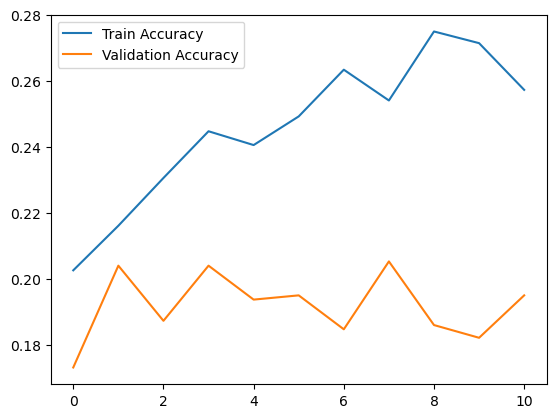

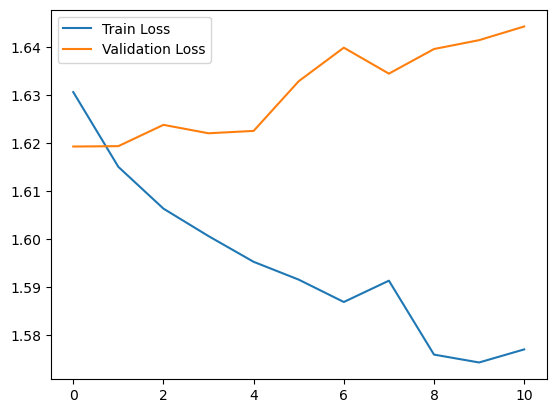

In [484]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [485]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_TRAIN, Y_TRAIN,
    validation_data=(X_TEST, Y_TEST),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2306 - loss: 1.6143 - val_accuracy: 0.1887 - val_loss: 1.6223
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2250 - loss: 1.6060 - val_accuracy: 0.1887 - val_loss: 1.6285
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2383 - loss: 1.5950 - val_accuracy: 0.1951 - val_loss: 1.6247
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2607 - loss: 1.5938 - val_accuracy: 0.2015 - val_loss: 1.6266
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2311 - loss: 1.5946 - val_accuracy: 0.1951 - val_loss: 1.6305
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2573 - loss: 1.5863 - val_accuracy: 0.1951 - val_loss: 1.6403
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2655 - loss: 1.5804 - val_accuracy: 0.2144 - val_loss: 1.6292
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2707 - loss: 1.5818 - val_accuracy: 0.1900

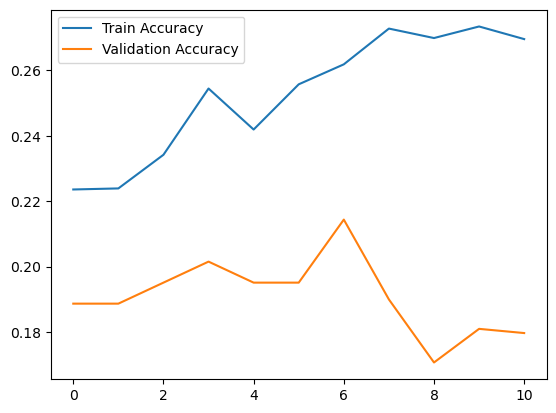

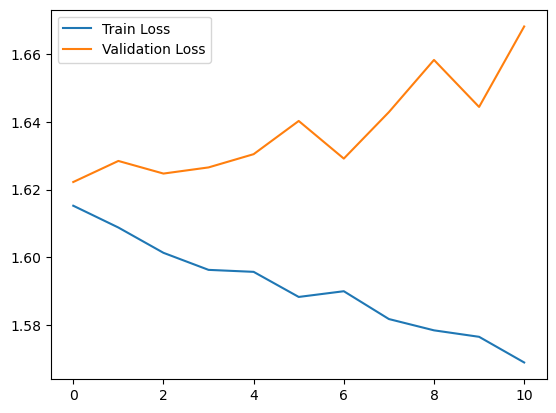

In [486]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [487]:
# Overfitting Issues:
# The training accuracy (blue line) is consistently higher and increasing while validation accuracy (orange line) is lower and declining



In [500]:
# Assuming you already have X_train, X_val, y_train, y_val

# Get number of features and classes
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Create and train ANN model
ann_model = ANNClassifier(input_shape=num_features, num_classes=num_classes)
history = ann_model.train(X_train, y_train, X_val, y_val)

# Plot training history
plot_training_history(history)

# Make predictions
predictions = ann_model.predict(X_val)

NameError: name 'X_train' is not defined